In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [23]:
paths = []

for dirname, _, filenames in os.walk('../raw_data/'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
paths

['../data/event_popularity_benchmark_private_test_only.csv',
 '../data/random_benchmark.csv',
 '../data/users.csv',
 '../data/user_friends.csv',
 '../data/event_popularity_benchmark.csv',
 '../data/events.csv',
 '../data/test.csv',
 '../data/public_leaderboard_solution.csv',
 '../data/event_attendees.csv',
 '../data/train.csv']

In [24]:
dataframes = [pd.read_csv(path) for path in paths]

In [25]:
event_popularity_benchmark_private_test_only_df, random_benchmark_df, users_df, user_friends_df, event_popularity_benchmark_df, events_df, test_df, public_leaderboard_solution_df, event_attendees_df, train_df = dataframes

In [26]:
# train.csv, test.csv, users.csv, user_friends.csv, events.csv, and event_attendees.csv. These are the files with data in them.
users_df.head()

,user_id,locale,birthyear,gender,joinedAt,location,timezone
0,3197468391,id_ID,1993,male,2012-10-02T06:40:55.524Z,Medan Indonesia,480.0
1,3537982273,id_ID,1992,male,2012-09-29T18:03:12.111Z,Medan Indonesia,420.0
2,823183725,en_US,1975,male,2012-10-06T03:14:07.149Z,Stratford Ontario,-240.0
3,1872223848,en_US,1991,female,2012-11-04T08:59:43.783Z,Tehran Iran,210.0
4,3429017717,id_ID,1995,female,2012-09-10T16:06:53.132Z,NaN,420.0


In [27]:
user_friends_df.head()

,user,friends
0,3197468391,1346449342 3873244116 4226080662 1222907620 54...
1,3537982273,1491560444 395798035 2036380346 899375619 3534...
2,823183725,1484954627 1950387873 1652977611 4185960823 42...
3,1872223848,83361640 723814682 557944478 1724049724 253059...
4,3429017717,4253303705 2130310957 1838389374 3928735761 71...


In [28]:
event_attendees_df.head()

,event,yes,maybe,invited,no
0,1159822043,1975964455 252302513 4226086795 3805886383 142...,2733420590 517546982 1350834692 532087573 5831...,1723091036 3795873583 4109144917 3560622906 31...,3575574655 1077296663
1,686467261,2394228942 2686116898 1056558062 3792942231 41...,1498184352 645689144 3770076778 331335845 4239...,1788073374 733302094 1830571649 676508092 7081...,NaN
2,1186208412,NaN,3320380166 3810793697,1379121209 440668682,1728988561 2950720854
3,2621578336,NaN,NaN,NaN,NaN
4,855842686,2406118796 3550897984 294255260 1125817077 109...,2671721559 1761448345 2356975806 2666669465 10...,1518670705 880919237 2326414227 2673818347 332...,3500235232


In [29]:
events_df.head()

,event_id,user_id,start_time,city,state,zip,country,lat,lng,c_1,...,c_92,c_93,c_94,c_95,c_96,c_97,c_98,c_99,c_100,c_other
0,684921758,3647864012,2012-10-31T00:00:00.001Z,NaN,NaN,NaN,NaN,NaN,NaN,2,...,0,1,0,0,0,0,0,0,0,9
1,244999119,3476440521,2012-11-03T00:00:00.001Z,NaN,NaN,NaN,NaN,NaN,NaN,2,...,0,0,0,0,0,0,0,0,0,7
2,3928440935,517514445,2012-11-05T00:00:00.001Z,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,12
3,2582345152,781585781,2012-10-30T00:00:00.001Z,NaN,NaN,NaN,NaN,NaN,NaN,1,...,0,0,0,0,0,0,0,0,0,8
4,1051165850,1016098580,2012-09-27T00:00:00.001Z,NaN,NaN,NaN,NaN,NaN,NaN,1,...,0,0,0,0,0,0,0,0,0,9


In [30]:
for_plotting = events_df.drop(columns=['event_id','user_id','start_time','city','state','zip','country','lat','lng', 'c_other'])
# sns.barplot(train_df['user'].value_counts()[:10])


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Axes: xlabel='Highest Occuring Categories', ylabel='Count'>

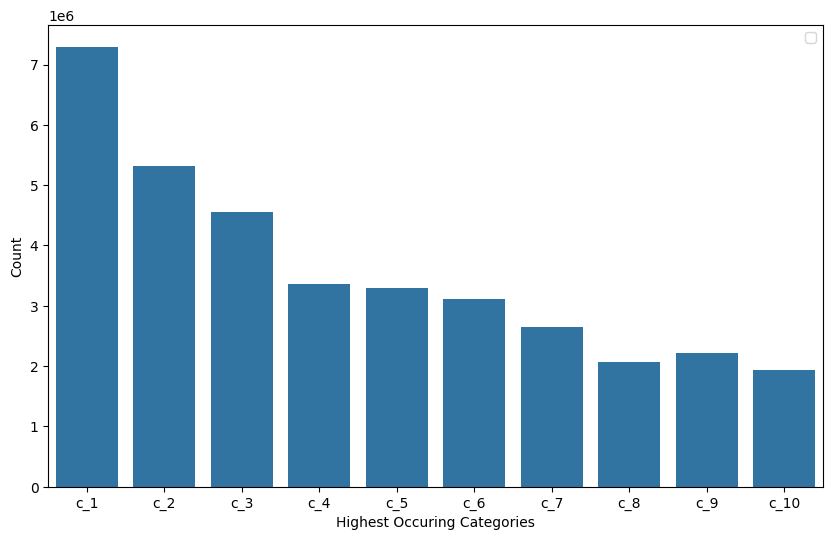

In [31]:
plt.figure(figsize=(10, 6))
plt.xlabel('Highest Occuring Categories')
plt.ylabel('Count')
plt.legend()
sns.barplot(x=for_plotting.columns[:10], y=for_plotting.sum()[:10])

Total Sum: 85720768
Total Top 15 Sum: 43928955
Percentage: 51.246571892589664%


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


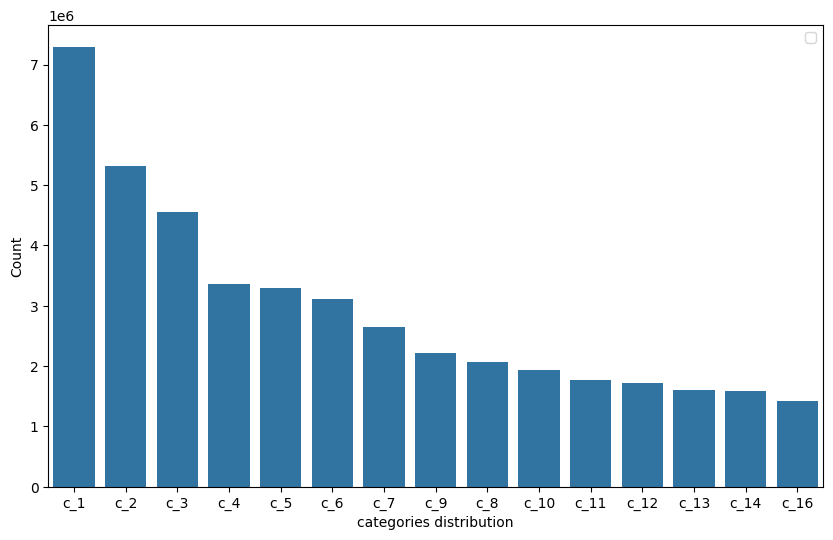

In [32]:
total_sum = for_plotting.sum().sum()
total_top_15_sum = for_plotting.sum().sort_values(ascending=False)[:15].sum()
print(f'Total Sum: {total_sum}')
print(f'Total Top 15 Sum: {total_top_15_sum}')
print(f'Percentage: {total_top_15_sum/total_sum*100}%')
plt.figure(figsize=(10, 6))
plt.xlabel('categories distribution')
plt.ylabel('Count')
sns.barplot(x=for_plotting.sum().sort_values(ascending=False)[:15].index, y=for_plotting.sum().sort_values(ascending=False)[:15])
plt.legend()

In [33]:
GLOBAL_COLUMNS = [*for_plotting.sum().sort_values(ascending=False)[:15].index, 'event_id',	'user_id',	'start_time',	'city',	'state',	'zip',	'country',	'lat',	'lng']
events_df_modified = events_df[GLOBAL_COLUMNS]


In [34]:
events_df_modified.head()

,c_1,c_2,c_3,c_4,c_5,c_6,c_7,c_9,c_8,c_10,...,c_16,event_id,user_id,start_time,city,state,zip,country,lat,lng
0,2,0,2,0,0,0,0,0,0,0,...,0,684921758,3647864012,2012-10-31T00:00:00.001Z,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0,2,0,0,0,0,0,0,0,...,0,244999119,3476440521,2012-11-03T00:00:00.001Z,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,0,0,0,0,0,0,0,0,...,0,3928440935,517514445,2012-11-05T00:00:00.001Z,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0,2,1,0,0,0,0,0,0,...,0,2582345152,781585781,2012-10-30T00:00:00.001Z,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1,0,0,0,0,0,0,2,0,...,0,1051165850,1016098580,2012-09-27T00:00:00.001Z,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
# events_df_modified.drop(columns=['city', 
#                                  'state', 
#                                  'zip', 
#                                  'country', 
#                                  ], inplace=True)

/tmp/ipykernel_4492/365290882.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_df_modified.drop(columns=['city',


In [36]:
# grouped_events_df = events_df.groupby('user_id').agg({'event_id': 'count'}).reset_index()
# grouped_events_df.rename(columns={'event_id': 'event_count'}, inplace=True)
# grouped_events_df.shape
# grouped_events_df.sort_values(by='event_count', ascending=False, inplace=True)


In [37]:
# grouped_events_df


,user_id,event_count
185737,415464198,93716
1892743,4236892345,19790
1778913,3982320065,3920
1773971,3971398353,1097
1490986,3337130725,730
...,...,...
800158,1791570384,1
800157,1791566648,1
800154,1791559686,1
800153,1791559664,1


In [38]:
# users_df.head()

,user_id,locale,birthyear,gender,joinedAt,location,timezone
0,3197468391,id_ID,1993,male,2012-10-02T06:40:55.524Z,Medan Indonesia,480.0
1,3537982273,id_ID,1992,male,2012-09-29T18:03:12.111Z,Medan Indonesia,420.0
2,823183725,en_US,1975,male,2012-10-06T03:14:07.149Z,Stratford Ontario,-240.0
3,1872223848,en_US,1991,female,2012-11-04T08:59:43.783Z,Tehran Iran,210.0
4,3429017717,id_ID,1995,female,2012-09-10T16:06:53.132Z,NaN,420.0


In [42]:
# users_df = users_df.merge(grouped_events_df, on='user_id', how='left')

In [43]:
# users_df

,user_id,locale,birthyear,gender,joinedAt,location,timezone,event_count
0,3197468391,id_ID,1993,male,2012-10-02T06:40:55.524Z,Medan Indonesia,480.0,NaN
1,3537982273,id_ID,1992,male,2012-09-29T18:03:12.111Z,Medan Indonesia,420.0,NaN
2,823183725,en_US,1975,male,2012-10-06T03:14:07.149Z,Stratford Ontario,-240.0,NaN
3,1872223848,en_US,1991,female,2012-11-04T08:59:43.783Z,Tehran Iran,210.0,NaN
4,3429017717,id_ID,1995,female,2012-09-10T16:06:53.132Z,NaN,420.0,NaN
...,...,...,...,...,...,...,...,...
38204,4064394129,en_US,1966,female,2012-06-12T02:03:42.571Z,NaN,-240.0,NaN
38205,446388078,id_ID,1997,male,2012-10-25T22:43:19.834Z,Medan Indonesia,420.0,NaN
38206,2548659919,id_ID,1995,male,2012-10-28T07:23:08.383Z,Jogjakarta Indonesia,420.0,NaN
38207,723239978,en_US,1989,male,2012-10-30T00:55:34.639Z,Yogyakarta,420.0,NaN


In [44]:
# users_df['event_count'].isnull().sum()

37640

In [45]:
# users_df.dropna()

,user_id,locale,birthyear,gender,joinedAt,location,timezone,event_count
172,2824605516,en_US,1993,male,2012-10-09T23:17:31.502Z,Fullerton California,-480.0,1.0
248,3250026293,en_US,1993,female,2012-10-28T23:36:18.341Z,San Clemente California,-480.0,1.0
324,818041391,en_US,1984,male,2012-11-25T15:56:32.553Z,Lincoln Heights California,-480.0,1.0
325,3083039122,en_US,1991,female,2012-10-14T04:12:17.834Z,Bell Gardens California,-480.0,1.0
335,2309952902,de_DE,1974,male,2012-10-14T14:24:36.829Z,Essen,120.0,1.0
...,...,...,...,...,...,...,...,...
37518,4092652247,en_US,1992,female,2012-11-03T12:08:51.449Z,Phnom Penh,420.0,1.0
37524,640452600,en_US,1977,male,2012-10-22T05:58:17.110Z,Los Angeles California,-480.0,1.0
37781,743705823,en_US,1967,male,2012-11-10T18:45:22.824Z,Anaheim California,-480.0,5.0
38007,1455874424,en_US,1990,female,2012-09-29T00:24:11.275Z,Los Angeles California,-480.0,1.0


In [46]:
# user_friends_df.head()

,user,friends
0,3197468391,1346449342 3873244116 4226080662 1222907620 54...
1,3537982273,1491560444 395798035 2036380346 899375619 3534...
2,823183725,1484954627 1950387873 1652977611 4185960823 42...
3,1872223848,83361640 723814682 557944478 1724049724 253059...
4,3429017717,4253303705 2130310957 1838389374 3928735761 71...


In [50]:
# user_friends_df.loc[user_friends_df['user'] == 2309952902]


,user,friends
335,2309952902,2968251991 1822811554 1026464548 4057301984 31...
